# Computer Vision Masterclass - Face detection

## OpenCV

### Loading the image

In [ ]:
import cv2

In [ ]:
image = cv2.imread('people1.jpg')
image.shape

(1280, 1920, 3)

In [ ]:
#cv2.imshow(image): not working in colab
from google.colab.patches import cv2_imshow
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
image = cv2.resize(image, (800, 600))
image.shape

(600, 800, 3)

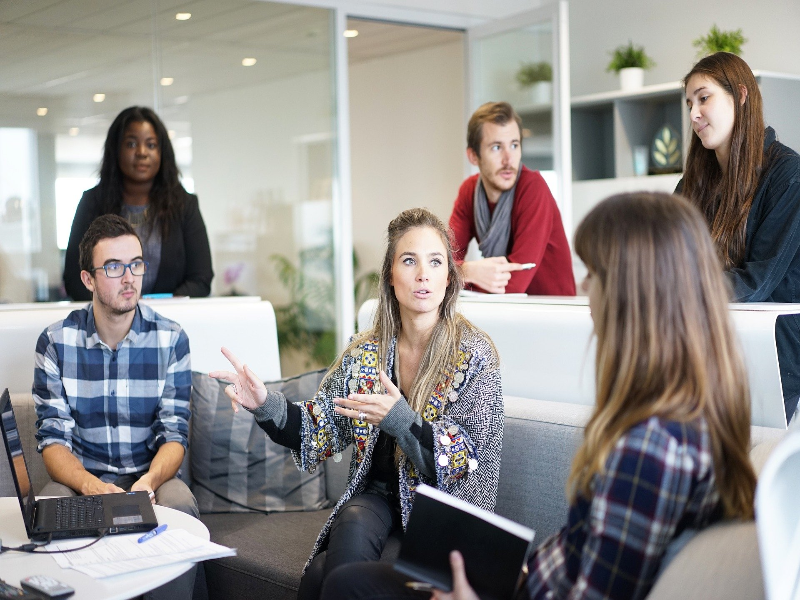

In [ ]:
cv2_imshow(image)

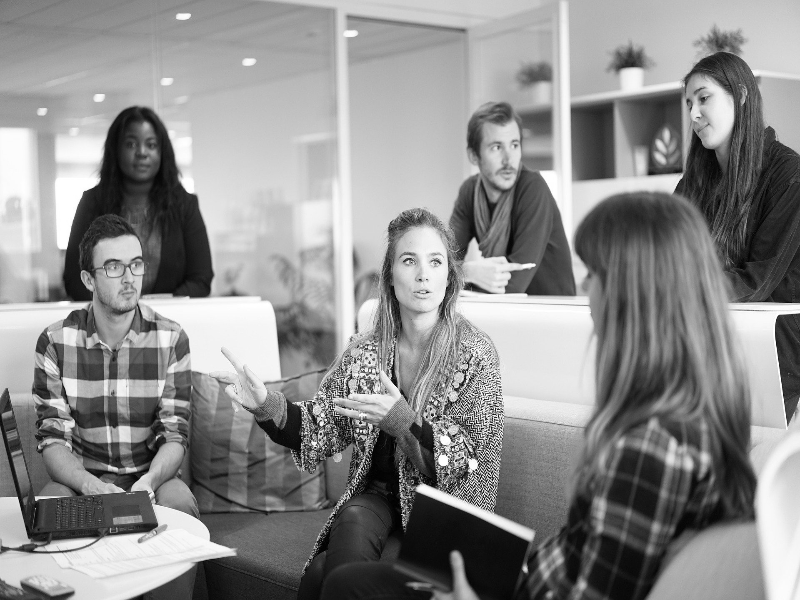

In [ ]:
# Why use grayscale image?: Casacade detectors with opencv recommands to use grayscale images.
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

In [ ]:
image_gray.shape

(600, 800)

### Detecting faces

In [ ]:
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
detections = face_detector.detectMultiScale(image_gray)

In [ ]:
# column: the number of faces that detected
# row 1: axis of X
# row 2: axis of Y
# row 3, 4: size of the face that detected
detections

array([[677,  72,  68,  68],
       [115, 124,  53,  53],
       [475, 123,  59,  59],
       [387, 233,  73,  73],
       [ 92, 239,  66,  66],
       [390, 323,  56,  56]], dtype=int32)

In [ ]:
#len means the number of faces
len(detections)

6

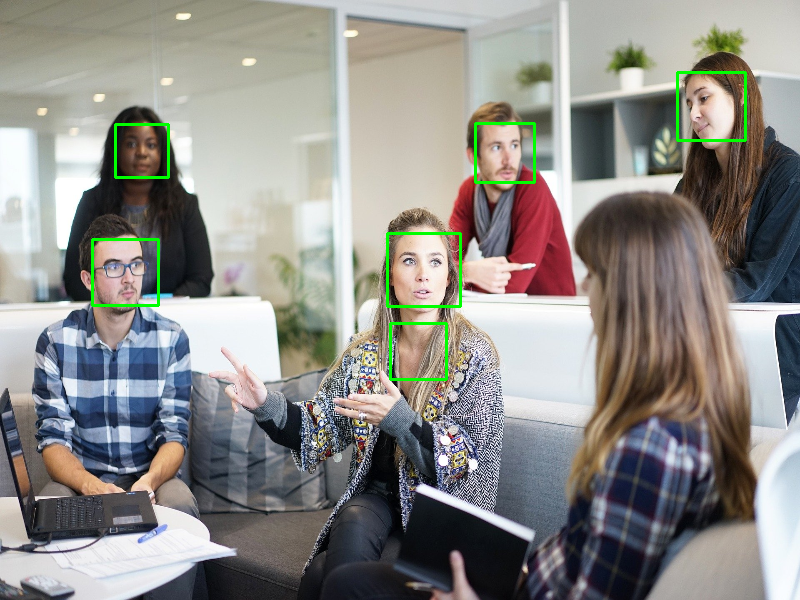

In [ ]:
for x, y, w, h in detections:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0,255,0), 2)
  
cv2_imshow(image)

### Haarcascade parameters

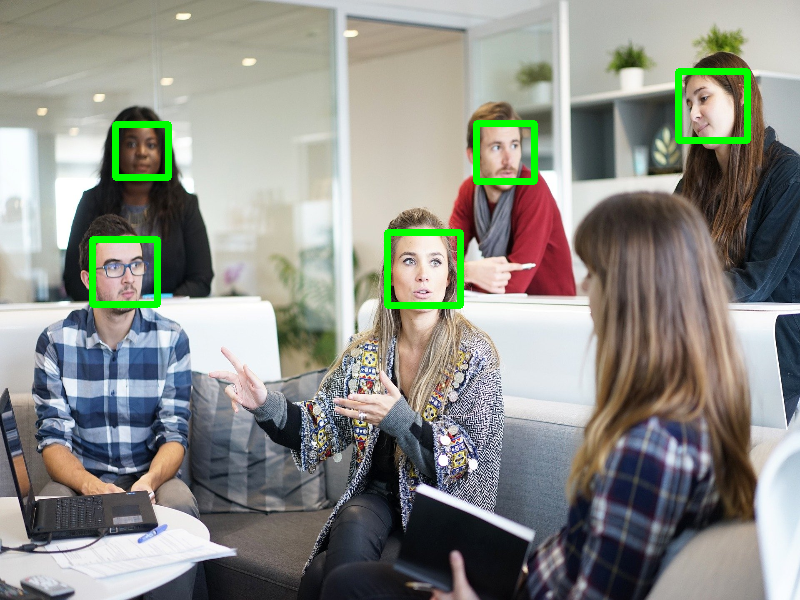

In [ ]:
image = cv2.imread('people1.jpg')
image = cv2.resize(image, (800, 600))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# scaleFactor: automatically resize images that we want to detect 
#  = the larger images, the bigger scaleFactor value
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.21)

for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0,255,0), 5)
  
cv2_imshow(image)

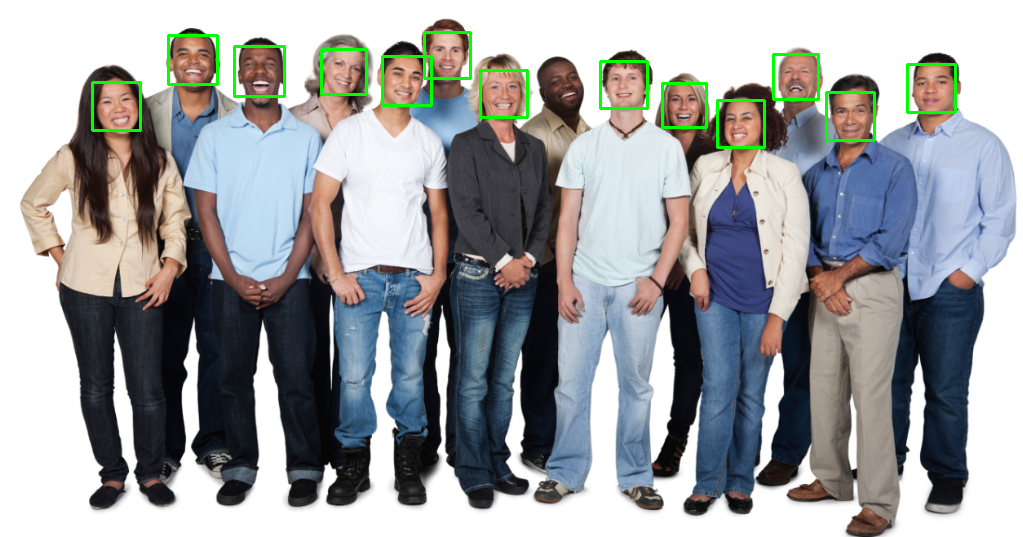

In [ ]:
image = cv2.imread('people2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#minNeighbors: indicates the number of neighbor rectangles that must exist for the final rectangle to be generated
#minSize, maxSize: minimum, Maximum values of rectangle
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.2, minNeighbors=3, minSize=(30,30), maxSize=(50, 50))

for x, y, w, h in detections:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0,255,0), 2)
  
cv2_imshow(image)

### Eye detection

In [ ]:
eye_detector = cv2.CascadeClassifier('haarcascade_eye.xml')

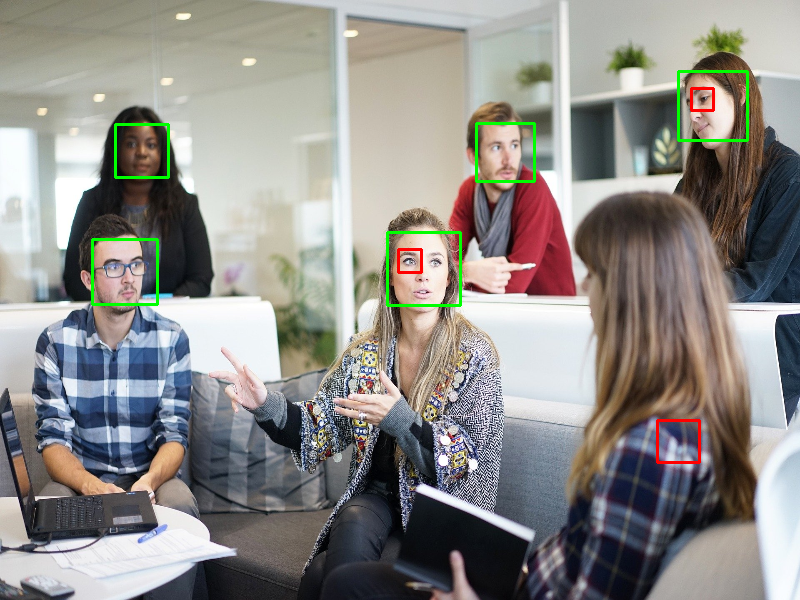

In [ ]:
image = cv2.imread('people1.jpg')
image = cv2.resize(image, (800, 600))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.21)

for x, y, w, h in face_detections:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

eye_detections = eye_detector.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=7)
for x, y, w, h in eye_detections:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)

cv2_imshow(image)

In [ ]:
image = cv2.imread('people1.jpg')
#image = cv2.resize(image, (800, 600)) <- Not doing resize can be useful to detection
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.21)

for x, y, w, h in face_detections:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

eye_detections = eye_detector.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=7, maxSize=(40, 40))
for x, y, w, h in eye_detections:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)

cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.